# Steepest Descent

In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

Here's a function. It's an oblong bowl made of two quadratic functions.

This is pretty much the easiest 2D optimization job out there.

In [2]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

Let's take a look at the function. First in 3D:

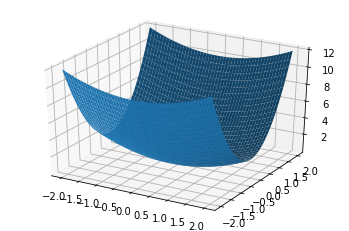

In [3]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

And then as a "contour plot":

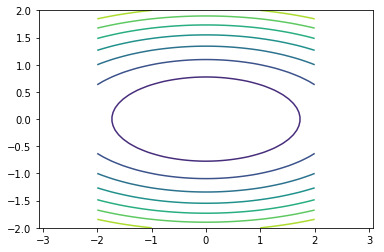

In [4]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

Next, initialize steepest descent with a starting guess:

In [319]:
guesses = [np.array([2, 2./5])]

Next, run Steepest Descent:

In [356]:
#clear
x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s
guesses.append(next_guess)

print(next_guess)

[ 6.10454625e-07 -1.22090963e-07]


Here's some plotting code to illustrate what just happened:

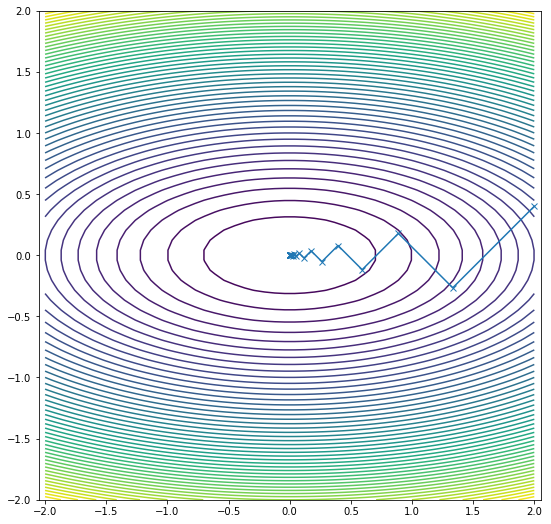

In [357]:
pt.figure(figsize=(9, 9))
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

In [358]:
for i, guess in enumerate(guesses):
    print(i, la.norm(guess, 2))

0 2.039607805437114
1 1.3597385362818037
2 0.9064923598953564
3 0.6043282354184075
4 0.402885493365651
5 0.268590327422494
6 0.1790602196535349
7 0.11937347850578087
8 0.07958231961357493
9 0.05305487971599619
10 0.03536991972494859
11 0.023579946499640153
12 0.0157199643742649
13 0.01047997619145283
14 0.006986650869603477
15 0.004657767182597052
16 0.00310517817085647
17 0.0020701187313361103
18 0.0013800791942763257
19 0.0009200527639282007
20 0.0006133685351837453
21 0.0004089123383293087
22 0.00027260823928739256
23 0.00018173881650443178
24 0.0001211592177181258
25 8.077280684766319e-05
26 5.3848541322305716e-05
27 3.589902516077526e-05
28 2.393268515749757e-05
29 1.595512232752962e-05
30 1.0636748894671809e-05
31 7.0911654939472895e-06
32 4.727443954112351e-06
33 3.1516290931456465e-06
34 2.101086219381249e-06
35 1.4007240373068642e-06
36 9.33816096573883e-07
37 6.22544015961566e-07


## Adding in "momentum" / the "heavy ball" method

Steepest descent with added "momentum" term:

$$x_{k+1} = x_k - \alpha \nabla f(x_k) \color{red}{+ \beta (x_{k}-x_{k-1})}$$

In [285]:
guesses = [np.array([2, 2./5])]

# beta = 0.01
beta = 0.1
# beta = 0.5
# beta = 1

Explore different choices of the "momentum parameter" $\beta$ above.

In [312]:
#clear
x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s

if len(guesses) >= 2:
    next_guess = next_guess + beta * (guesses[-1] - guesses[-2])

guesses.append(next_guess)

print(next_guess)

[8.71963591e-08 1.00428680e-07]


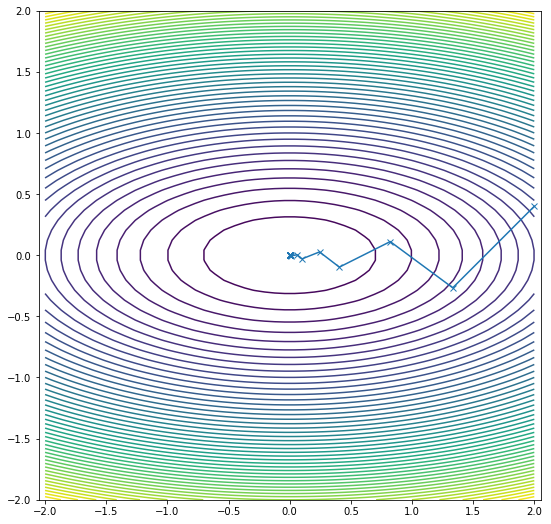

In [317]:
pt.figure(figsize=(9, 9))
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

In [315]:
for i, guess in enumerate(guesses):
    print(i, la.norm(guess, 2))

0 2.039607805437114
1 1.3597385362818037
2 0.8296957665641046
3 0.41785029923493805
4 0.24532582175768264
5 0.10508154968346078
6 0.059791922016322774
7 0.015328144502394192
8 0.006032673968378717
9 0.0014933302414913351
10 0.0005424642572479524
11 0.00047936890761598815
12 0.0003323789236199735
13 2.406707379103359e-05
14 4.320675845534447e-05
15 1.3649136343804876e-05
16 5.333125657925825e-06
17 2.656196917967379e-06
18 1.2987876444411142e-06
19 6.899983272977852e-07
20 3.833795500074894e-07
21 1.3300046913355573e-07
